# import libraries and  load csv file

In [69]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'E:\1.Data analysis document\POWER BI\Raw data\Coffee Shop Sales.csv')
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11 AM,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56 AM,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04 AM,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24 AM,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41 AM,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,6/30/2023,8:18:41 PM,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,6/30/2023,8:25:10 PM,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,6/30/2023,8:31:34 PM,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,6/30/2023,8:57:19 PM,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


# Check data type and missing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


# Combine transaction date and time

In [4]:
df['transaction_datetime'] = df['transaction_date'] +' '+ df['transaction_time']

In [5]:
df.drop(columns=['transaction_date','transaction_time'], inplace= True)

In [6]:
df

,transaction_id,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_datetime
0,1,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,1/1/2023 7:06:11 AM
1,2,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1/1/2023 7:08:56 AM
2,3,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1/1/2023 7:14:04 AM
3,4,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1/1/2023 7:20:24 AM
4,5,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1/1/2023 7:22:41 AM
...,...,...,...,...,...,...,...,...,...,...
149111,149452,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,6/30/2023 8:18:41 PM
149112,149453,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6/30/2023 8:25:10 PM
149113,149454,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,6/30/2023 8:31:34 PM
149114,149455,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,6/30/2023 8:57:19 PM


# Change data type

In [7]:
df['transaction_datetime'] = pd.to_datetime(df['transaction_datetime'])
df

,transaction_id,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_datetime
0,1,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11
1,2,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56
2,3,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:04
3,4,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:24
4,5,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:22:41
...,...,...,...,...,...,...,...,...,...,...
149111,149452,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023-06-30 20:18:41
149112,149453,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023-06-30 20:25:10
149113,149454,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,2023-06-30 20:31:34
149114,149455,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,2023-06-30 20:57:19


In [8]:
df['transaction_date'] = df['transaction_datetime'].dt.date


In [9]:
df['transaction_time'] = df['transaction_datetime'].dt.floor('H').dt.time

# Adding columns

In [17]:
df['transaction_month'] = df['transaction_datetime'].dt.strftime('%b %Y')
df

,transaction_id,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_datetime,transaction_date,transaction_time,transaction_month,total_sale
0,1,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11,2023-01-01,07:00:00,Jan 2023,6.00
1,2,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56,2023-01-01,07:00:00,Jan 2023,6.20
2,3,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:04,2023-01-01,07:00:00,Jan 2023,9.00
3,4,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:24,2023-01-01,07:00:00,Jan 2023,2.00
4,5,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:22:41,2023-01-01,07:00:00,Jan 2023,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023-06-30 20:18:41,2023-06-30,20:00:00,Jun 2023,5.00
149112,149453,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023-06-30 20:25:10,2023-06-30,20:00:00,Jun 2023,6.00
149113,149454,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,2023-06-30 20:31:34,2023-06-30,20:00:00,Jun 2023,3.00
149114,149455,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,2023-06-30 20:57:19,2023-06-30,20:00:00,Jun 2023,3.75


In [16]:
df['total_sale'] = df['transaction_qty']*df['unit_price']

# Analysis

## Total sales, qty and transaction

In [11]:
total_sales = (df['transaction_qty']*df['unit_price']).sum()


In [12]:
total_qty = df['transaction_qty'].sum()

In [13]:
total_transaction = df['transaction_id'].nunique()
total_transaction

149116

## analysis per month

### generate order month list

In [14]:
start_month = pd.to_datetime(df['transaction_date']).min()
end_month = pd.to_datetime(df['transaction_date']).max()
months_range = pd.date_range(start_month, end_month,freq='MS').strftime('%b %Y')
months_range

Index(['Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023'], dtype='object')

In [19]:
group_by = df.groupby('transaction_month')[['total_sale','transaction_qty','transaction_id']].agg({'total_sale':'sum','transaction_qty':'sum', 'transaction_id':'count'}).loc[months_range].reset_index()
group_by


,index,total_sale,transaction_qty,transaction_id
0,Jan 2023,81677.74,24870,17314
1,Feb 2023,76145.19,23550,16359
2,Mar 2023,98834.68,30406,21229
3,Apr 2023,118941.08,36469,25335
4,May 2023,156727.76,48233,33527
5,Jun 2023,166485.88,50942,35352


# Top 5 products

In [24]:
top_productsale = df.groupby('product_type')[['total_sale','transaction_qty','transaction_id']].agg(
    {
        'total_sale':'sum',
        'transaction_qty':'sum',
        'transaction_id':'count'
    }
).reset_index().sort_values(by='total_sale',ascending= False)
top_productsale.head(5)

,product_type,total_sale,transaction_qty,transaction_id
0,Barista Espresso,91406.20,24943,16403
4,Brewed Chai tea,77081.95,26250,17183
17,Hot chocolate,72416.00,17457,11468
13,Gourmet brewed coffee,70034.60,25973,16912
3,Brewed Black tea,47932.00,17462,11350


# Top 5 bottom products

In [25]:
top_productsale.tail(5)

,product_type,total_sale,transaction_qty,transaction_id
2,Black tea,2711.85,303,303
28,Sugar free syrup,2324.00,2905,1811
21,Organic Chocolate,1679.60,221,221
15,Green tea,1470.75,159,159
14,Green beans,1340.00,134,134


# Proportion per location


In [27]:
proportion_sale_by_location = df.groupby('store_location')['total_sale'].sum().reset_index()
proportion_sale_by_location['proportion'] = round(proportion_sale_by_location['total_sale']/ total_sales*100,2)
proportion_sale_by_location

,store_location,total_sale,proportion
0,Astoria,232243.91,33.23
1,Hell's Kitchen,236511.17,33.84
2,Lower Manhattan,230057.25,32.92


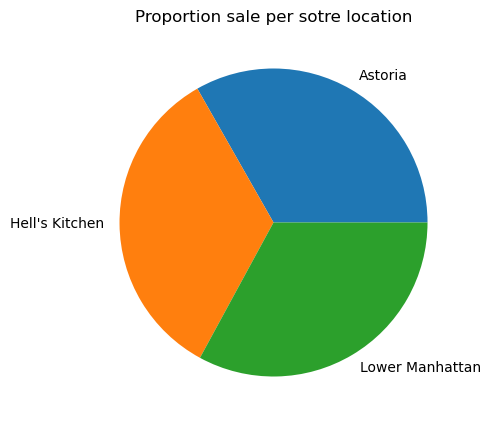

In [77]:
plt.figure(figsize=(10,5))
ax = plt.pie(
    x= proportion_sale_by_location['proportion'],
    labels= proportion_sale_by_location['store_location'],
)
plt.title('Proportion sale per sotre location')
plt.show()

# peak order time

In [28]:
df['day'] =df['transaction_datetime'].dt.strftime('%a')
df

,transaction_id,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_datetime,transaction_date,transaction_time,transaction_month,total_sale,day
0,1,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11,2023-01-01,07:00:00,Jan 2023,6.00,Sun
1,2,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56,2023-01-01,07:00:00,Jan 2023,6.20,Sun
2,3,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:04,2023-01-01,07:00:00,Jan 2023,9.00,Sun
3,4,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:24,2023-01-01,07:00:00,Jan 2023,2.00,Sun
4,5,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:22:41,2023-01-01,07:00:00,Jan 2023,6.20,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023-06-30 20:18:41,2023-06-30,20:00:00,Jun 2023,5.00,Fri
149112,149453,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023-06-30 20:25:10,2023-06-30,20:00:00,Jun 2023,6.00,Fri
149113,149454,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,2023-06-30 20:31:34,2023-06-30,20:00:00,Jun 2023,3.00,Fri
149114,149455,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,2023-06-30 20:57:19,2023-06-30,20:00:00,Jun 2023,3.75,Fri


In [57]:
df2 = df.groupby(['day','transaction_time'])['transaction_id'].count().reset_index()
df2['day'] = pd.Categorical(df2['day'],categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],ordered=True)
df2

,day,transaction_time,transaction_id
0,Fri,06:00:00,707
1,Fri,07:00:00,1989
2,Fri,08:00:00,2544
3,Fri,09:00:00,2707
4,Fri,10:00:00,2761
...,...,...,...
100,Wed,16:00:00,1272
101,Wed,17:00:00,1235
102,Wed,18:00:00,1118
103,Wed,19:00:00,836


In [67]:
peak_order = pd.pivot_table(
    data= df2,
    values='transaction_id',
    index='transaction_time',
    columns='day',
    aggfunc='mean'
)
peak_order

day,Mon,Tue,Wed,Thu,Fri,Sat,Sun
transaction_time,,,,,,,
06:00:00,661.0,489.0,698.0,731.0,707.0,592.0,716.0
07:00:00,1992.0,1846.0,1873.0,1959.0,1989.0,1877.0,1892.0
08:00:00,2482.0,2783.0,2540.0,2389.0,2544.0,2438.0,2478.0
09:00:00,2494.0,2753.0,2527.0,2375.0,2707.0,2345.0,2563.0
10:00:00,2612.0,2846.0,2596.0,2570.0,2761.0,2551.0,2609.0
11:00:00,1478.0,1301.0,1468.0,1470.0,1405.0,1307.0,1337.0
12:00:00,1308.0,1126.0,1226.0,1307.0,1231.0,1279.0,1231.0
13:00:00,1267.0,1152.0,1311.0,1317.0,1199.0,1187.0,1281.0
14:00:00,1376.0,1224.0,1257.0,1341.0,1265.0,1226.0,1244.0


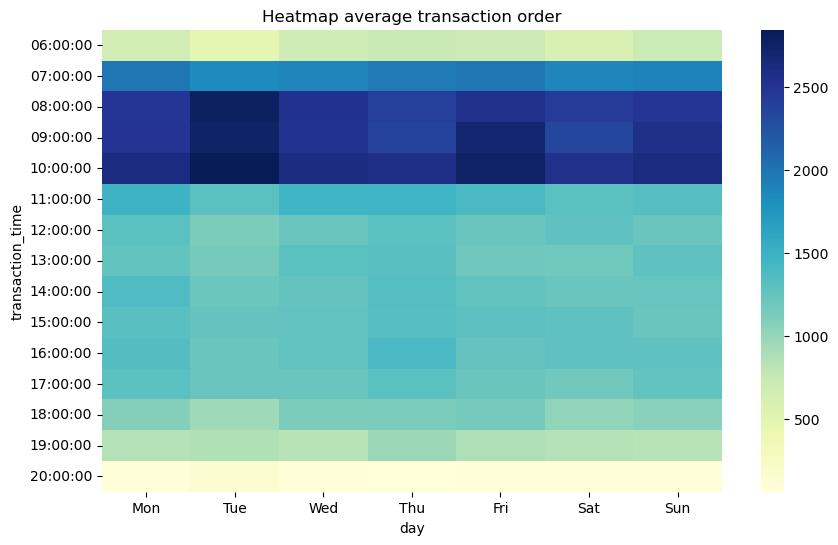

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(data= peak_order,annot=False,cmap='YlGnBu')
plt.title('Heatmap average transaction order')
plt.show()